In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Affichage plus lisible
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

sns.set(style="whitegrid")


In [ ]:
# 1. Reload propre pour repartir sur une base saine
X = pd.read_csv("X_train.csv")
y = pd.read_csv("y_train.csv")

# 2. Renommer la colonne ID
X = X.rename(columns={"Unnamed: 0": "ID"})
y = y.rename(columns={"Unnamed: 0": "ID"})

print("Colonnes de X :", X.columns[:10])
print("Colonnes de y :", y.columns)

# 3. Vérification : même ensemble d'IDs ?
same_ids = (X["ID"].values == y["ID"].values).all()
print("\nLes IDs sont-ils alignés dans le même ordre ?", same_ids)

# 4. Fusion correcte
if same_ids:
    df = X.copy()
    df["MathScore"] = y["MathScore"].values
else:
    print("\n❗ Les IDs ne sont pas alignés — on fusionne explicitement par ID.")
    df = X.merge(y, on="ID", how="inner")

print("\nShape de df :", df.shape)

df.head()


Colonnes de X : Index(['ID', 'Year', 'CNT', 'CNTRYID', 'CNTSCHID', 'CNTSTUID', 'CYC', 'NatCen', 'STRATUM', 'SUBNATIO'], dtype='object')
Colonnes de y : Index(['ID', 'MathScore'], dtype='object')

Les IDs sont-ils alignés dans le même ordre ? True

Shape de df : (1172086, 308)


,ID,Year,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,OECD,ADMINMODE,LANGTEST_QQQ,LANGTEST_COG,LANGTEST_PAQ,Option_CT,Option_FL,Option_ICTQ,Option_WBQ,Option_PQ,Option_TQ,Option_UH,ST001D01T,ST003D02T,ST003D03T,ST004D01T,EFFORT1,EFFORT2,OCOD1,OCOD2,OCOD3,AGE,GRADE,ISCEDP,IMMIG,COBN_S,MISSSC,MATHEASE,WB153,ST253,ST311,WB165,IC171,ST038,IC180,ST255,ST350,ST034,FL162,PA195,ST330,FL169,ST230,ST331,ST354,PA042,ST305,ST258,PA167,IC176,ST352,IC173,PA188,ST283,ST256,WB154,WB166,FL150,ST266,IC174,ST005,ST021,IC182,FL164,FL160,ST267,ST338,ST351,ST342,ST355,FL166,PA183,ST007,FL170,WB168,WB163,IC184,ST348,ST226,ST336,WB160,FL167,PA166,ST250,ST268,IC177,PA196,IC183,ST275,IC172,...,reading_q12_average_score,reading_q13_average_score,reading_q14_average_score,reading_q15_average_score,math_q1_average_score,math_q2_average_score,math_q3_average_score,math_q4_average_score,math_q5_average_score,math_q6_average_score,math_q7_average_score,math_q8_average_score,math_q9_average_score,math_q10_average_score,math_q11_average_score,math_q12_average_score,math_q13_average_score,math_q14_average_score,math_q15_average_score,math_q16_average_score,math_q17_average_score,math_q18_average_score,math_q19_average_score,math_q20_average_score,math_q21_average_score,science_q1_average_score,science_q2_average_score,science_q3_average_score,science_q4_average_score,science_q5_average_score,science_q6_average_score,science_q7_average_score,science_q8_average_score,science_q9_average_score,science_q10_average_score,science_q11_average_score,science_q12_average_score,science_q13_average_score,science_q14_average_score,science_q15_average_score,science_q16_average_score,science_q17_average_score,science_q18_average_score,science_q19_average_score,reading_q1_total_timing,reading_q2_total_timing,reading_q3_total_timing,reading_q4_total_timing,reading_q5_total_timing,reading_q6_total_timing,reading_q7_total_timing,reading_q8_total_timing,reading_q9_total_timing,reading_q10_total_timing,reading_q11_total_timing,reading_q12_total_timing,reading_q13_total_timing,reading_q14_total_timing,reading_q15_total_timing,math_q1_total_timing,math_q2_total_timing,math_q3_total_timing,math_q4_total_timing,math_q5_total_timing,math_q6_total_timing,math_q7_total_timing,math_q8_total_timing,math_q9_total_timing,math_q10_total_timing,math_q11_total_timing,math_q12_total_timing,math_q13_total_timing,math_q14_total_timing,math_q15_total_timing,math_q16_total_timing,math_q17_total_timing,math_q18_total_timing,math_q19_total_timing,math_q20_total_timing,math_q21_total_timing,science_q1_total_timing,science_q2_total_timing,science_q3_total_timing,science_q4_total_timing,science_q5_total_timing,science_q6_total_timing,science_q7_total_timing,science_q8_total_timing,science_q9_total_timing,science_q10_total_timing,science_q11_total_timing,science_q12_total_timing,science_q13_total_timing,science_q14_total_timing,science_q15_total_timing,science_q16_total_timing,science_q17_total_timing,science_q18_total_timing,science_q19_total_timing,MathScore
0,384002,2022,NLD,528.0,52800132.0,52801144.0,08MS,52800,NLD06,5280000,1.0,2.0,322.0,322.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,1.0,10.0,2.0,2007.0,1.0,8.0,8.0,3256.0,2212.0,9999.0,15.75,0.0,244.0,2.0,52800.0,0.0,0.0,2.5,1.0,3.25,1.0,0.0,0.0,0.0,0.666667,0.0,2.333333,3.666667,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,2.25,0.0,0.0,0.0,0.0,0.0,0.0,1.75,5.25,2.0,1.0,2.0,1.0,0.0,0.75,0.0,0.0,14.0,2.333333,3.0,0.0,0.0,0.0,0.0,0.5,0.0,1.0,1.25,1.0,6.5,0.0,0.0,1.0,0.0,0.5,2.666667,0.0,4.0,3.0,0.0,0.0,0.0,1.666667,0.0,...,NaN,NaN,NaN,NaN,0.666667,0.25,1.000000,0.5,0.0,1.0,0.0,0.5,1.000000,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.5,0.0,0.333333,0.000000,0.666667,0.5,0.333333,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18736.0,23055.25,162720.00,110641.333333,96368.333333,71813.5,98875.000000,63689.400000,37232.000000,88274.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84299.333333,90

In [ ]:
target_col = "MathScore"

print("Shape de df :", df.shape)

print("\n➤ Répartition des types de variables :")
print(df.dtypes.value_counts())

print("\n➤ Aperçu des 20 premières colonnes et leurs types :")
print(df.dtypes.head(20))

# Séparation numérique / non numérique (hors cible)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

print(f"\nNombre de colonnes numériques (y compris ID et {target_col}) :", len(num_cols))
print(f"Nombre de colonnes non numériques :", len(cat_cols))

print("\nExemples de colonnes numériques :")
print(num_cols[:20])

print("\nExemples de colonnes non numériques :")
print(cat_cols[:20])

# ---- Valeurs manquantes ----
na_ratio = df.isna().mean().sort_values(ascending=False)

print("\n➤ Top 20 variables les plus manquantes (proportion de NA) :")
print(na_ratio.head(20))

print("\n➤ Statistiques globales sur la proportion de NA par variable :")
print(na_ratio.describe())


Shape de df : (1172086, 308)

➤ Répartition des types de variables :
float64    301
int64        4
object       3
Name: count, dtype: int64

➤ Aperçu des 20 premières colonnes et leurs types :
ID                int64
Year              int64
CNT              object
CNTRYID         float64
CNTSCHID        float64
CNTSTUID        float64
CYC              object
NatCen            int64
STRATUM          object
SUBNATIO          int64
OECD            float64
ADMINMODE       float64
LANGTEST_QQQ    float64
LANGTEST_COG    float64
LANGTEST_PAQ    float64
Option_CT       float64
Option_FL       float64
Option_ICTQ     float64
Option_WBQ      float64
Option_PQ       float64
dtype: object

Nombre de colonnes numériques (y compris ID et MathScore) : 305
Nombre de colonnes non numériques : 3

Exemples de colonnes numériques :
['ID', 'Year', 'CNTRYID', 'CNTSCHID', 'CNTSTUID', 'NatCen', 'SUBNATIO', 'OECD', 'ADMINMODE', 'LANGTEST_QQQ', 'LANGTEST_COG', 'LANGTEST_PAQ', 'Option_CT', 'Option_FL', 'Option_

Statistiques descriptives de MathScore :
count    1.172086e+06
mean     9.999513e+01
std      1.221761e+02
min      0.000000e+00
25%      0.000000e+00
50%      6.604880e+01
75%      1.528073e+02
max      8.149725e+02
Name: MathScore, dtype: float64


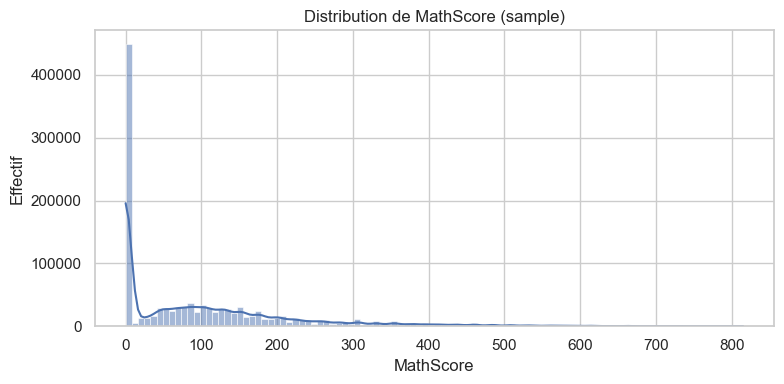


Valeurs min / max réelles de MathScore :
Min : 0.0
Max : 814.972459371057


In [ ]:
# 1. Statistiques descriptives
print("Statistiques descriptives de MathScore :")
print(df["MathScore"].describe())

plt.figure(figsize=(8,4))
sns.histplot(df["MathScore"], kde=True, bins=100)
plt.title("Distribution de MathScore (sample)")
plt.xlabel("MathScore")
plt.ylabel("Effectif")
plt.tight_layout()
plt.show()

# 2. Vérification des valeurs extrêmes
print("\nValeurs min / max réelles de MathScore :")
print("Min :", df["MathScore"].min())
print("Max :", df["MathScore"].max())


In [10]:
total = len(df)
zeros = (df["MathScore"] == 0).sum()
ratio = zeros / total

print(f"Nombre de MathScore = 0 : {zeros:,}")
print(f"Proportion : {ratio:.2%}")

print("\nStatistiques de MathScore pour les élèves ayant un vrai score (MathScore > 0) :")
print(df.loc[df["MathScore"] > 0, "MathScore"].describe())


Nombre de MathScore = 0 : 446,778
Proportion : 38.12%

Statistiques de MathScore pour les élèves ayant un vrai score (MathScore > 0) :
count    725308.000000
mean        161.590517
std         119.031721
min           2.228103
25%          77.983615
50%         129.362616
75%         204.419634
max         814.972459
Name: MathScore, dtype: float64


Shape après suppression des scores = 0 : (725308, 308)

Aperçu des valeurs de MathScore dans df_clean :
count    725308.000000
mean        161.590517
std         119.031721
min           2.228103
25%          77.983615
50%         129.362616
75%         204.419634
max         814.972459
Name: MathScore, dtype: float64

Proportion conservée : 0.618818073076549


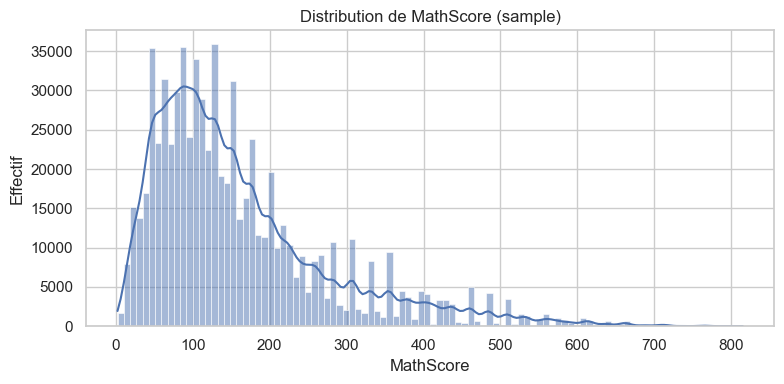

In [12]:
# On crée un df propre contenant uniquement des scores valides
df_clean = df[df["MathScore"] > 0].copy()

print("Shape après suppression des scores = 0 :", df_clean.shape)

print("\nAperçu des valeurs de MathScore dans df_clean :")
print(df_clean["MathScore"].describe())

print("\nProportion conservée :", df_clean.shape[0] / df.shape[0])

plt.figure(figsize=(8,4))
sns.histplot(df_clean["MathScore"], kde=True, bins=100)
plt.title("Distribution de MathScore (sample)")
plt.xlabel("MathScore")
plt.ylabel("Effectif")
plt.tight_layout()
plt.show()


In [13]:
target_col = "MathScore"

# Sélection des colonnes numériques (hors ID et hors target)
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c not in ["ID", target_col]]

print(f"Nombre de colonnes numériques analysées : {len(num_cols)}")

# Calcul des corrélations avec la cible
corr_with_target = df_clean[num_cols].corrwith(df_clean[target_col])

# Classement par valeur absolue
corr_sorted = corr_with_target.sort_values(key=lambda s: s.abs(), ascending=False)

print("\n🔝 Top 30 variables les plus corrélées avec MathScore :")
print(corr_sorted.head(30))

print("\n🔻 Bottom 30 (corrélations les plus faibles en valeur absolue) :")
print(corr_sorted.tail(30))

# Optionnel : sauvegarde rapide si besoin
# corr_sorted.to_csv("correlations_mathscore.csv")


Nombre de colonnes numériques analysées : 303


c:\Users\boumb\OneDrive - telecom-paristech.fr\Bureau\MLE\H!ckathon 2025\venv_hi\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\boumb\OneDrive - telecom-paristech.fr\Bureau\MLE\H!ckathon 2025\venv_hi\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\boumb\OneDrive - telecom-paristech.fr\Bureau\MLE\H!ckathon 2025\venv_hi\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)



🔝 Top 30 variables les plus corrélées avec MathScore :
reading_q15_total_timing     1.000000
reading_q15_average_score   -1.000000
reading_q14_total_timing     0.970938
reading_q13_average_score    0.655021
math_q16_average_score       0.593152
math_q15_average_score       0.530720
ST250                        0.506847
reading_q14_average_score    0.493326
Year                        -0.462703
ST003D03T                   -0.460318
reading_q12_average_score    0.459104
science_q12_average_score    0.441725
math_q2_average_score        0.426667
math_q12_average_score       0.410839
math_q14_average_score       0.410778
math_q3_average_score        0.409472
reading_q13_total_timing     0.404966
math_q13_average_score       0.404309
math_q11_average_score       0.394202
math_q7_average_score        0.379948
ST290                        0.372284
math_q1_average_score        0.363354
math_q9_average_score        0.353556
ST253                        0.351477
math_q8_average_score        0.3

In [ ]:
# 1. Colonnes avec NA > 95%
na_ratio = df_clean.isna().mean()
cols_high_na = na_ratio[na_ratio > 0.95].index.tolist()
print(f"Colonnes avec >95% de NA : {len(cols_high_na)}")

# 2. Colonnes avec variance nulle ou quasi-nulle
cols_zero_var = [
    c for c in df_clean.columns
    if df_clean[c].dtype != 'object' and df_clean[c].nunique() <= 1
]
print(f"Colonnes à variance nulle : {len(cols_zero_var)}")

# 3. Colonnes avec corrélation NaN
nan_corr_cols = corr_with_target[corr_with_target.isna()].index.tolist()
print(f"Colonnes à corrélation NaN : {len(nan_corr_cols)}")

# 4. Fusionner toutes les colonnes à supprimer
cols_to_drop = set(cols_high_na + cols_zero_var + nan_corr_cols)
cols_to_drop = list(cols_to_drop)

print("\nTotal des colonnes à supprimer :", len(cols_to_drop))
print(cols_to_drop[:20], "...")

# 5. Création du df nettoyé
df_model = df_clean.drop(columns=cols_to_drop)

print("\nNouveau shape du df_model :", df_model.shape)


Colonnes avec >95% de NA : 42
Colonnes à variance nulle : 24
Colonnes à corrélation NaN : 24

Total des colonnes à supprimer : 42
['math_q18_total_timing', 'science_q15_total_timing', 'reading_q13_total_timing', 'reading_q15_total_timing', 'reading_q10_total_timing', 'math_q15_total_timing', 'reading_q12_average_score', 'math_q20_average_score', 'reading_q14_average_score', 'science_q16_average_score', 'reading_q12_total_timing', 'reading_q10_average_score', 'science_q16_total_timing', 'science_q14_total_timing', 'math_q18_average_score', 'math_q17_average_score', 'math_q19_total_timing', 'math_q16_average_score', 'math_q19_average_score', 'science_q17_total_timing'] ...

Nouveau shape du df_model : (725308, 266)


In [15]:
target_col = "MathScore"

# Colonnes numériques (hors target et ID)
num_cols_final = df_model.select_dtypes(include=[np.number]).columns.tolist()
num_cols_final = [c for c in num_cols_final if c not in ["ID", target_col]]

print("Nombre de colonnes numériques après nettoyage :", len(num_cols_final))

# Corrélations recalculées
corr_final = df_model[num_cols_final].corrwith(df_model[target_col])

# Tri
corr_final_sorted = corr_final.sort_values(key=lambda s: s.abs(), ascending=False)

print("\n🔝 Top 30 corrélations après nettoyage :")
print(corr_final_sorted.head(30))

print("\n🔻 Bottom 30 corrélations après nettoyage :")
print(corr_final_sorted.tail(30))

# Exploration thématique : lecture / science / socio-éco / timings / flags
themes = ["read", "scien", "math", "ST", "time", "timing"]
print("\n\n🔍 Aperçu des features par thème :")
for th in themes:
    matches = [c for c in num_cols_final if th.lower() in c.lower()]
    print(f"- {th}: {len(matches)} variables")
    print(matches[:10], "...")


Nombre de colonnes numériques après nettoyage : 261

🔝 Top 30 corrélations après nettoyage :
ST250                        0.506847
Year                        -0.462703
ST003D03T                   -0.460318
math_q2_average_score        0.426667
math_q12_average_score       0.410839
math_q14_average_score       0.410778
math_q3_average_score        0.409472
math_q13_average_score       0.404309
math_q11_average_score       0.394202
math_q7_average_score        0.379948
ST290                        0.372284
math_q1_average_score        0.363354
math_q9_average_score        0.353556
ST253                        0.351477
math_q8_average_score        0.347674
math_q10_average_score       0.345522
science_q6_average_score     0.340283
ST254                        0.336638
science_q11_average_score    0.331602
math_q6_average_score        0.330335
math_q5_average_score        0.326267
science_q7_average_score     0.324289
reading_q9_average_score     0.304803
science_q5_average_score     0.30

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np

target_col = "MathScore"

# ===========================
# 1. Séparation X / y
# ===========================
X = df_model.drop(columns=[target_col])
y = df_model[target_col]

# Colonnes catégorielles (dans ton df_model ce sont bien des object)
cat_cols = ["CNT", "CYC", "STRATUM"]
num_cols = [c for c in X.columns if c not in cat_cols]

print("Nb features numériques :", len(num_cols))
print("Nb features catégorielles :", len(cat_cols))

# ===========================
# 2. Train-test split
# ===========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# ===========================
# 3. Préprocessing avec imputation
# ===========================
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_cols),
        ("cat", categorical_pipeline, cat_cols)
    ]
)

# ===========================
# 4. Modèle baseline
# ===========================
model = Ridge(alpha=1.0, random_state=42)

pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", model)
])

# ===========================
# 5. Entraînement
# ===========================
pipeline.fit(X_train, y_train)

# ===========================
# 6. Évaluation
# ===========================
preds = pipeline.predict(X_test)
rmse = root_mean_squared_error(y_test, preds)
corr = np.corrcoef(preds, y_test)[0, 1]

print("\nRMSE baseline Ridge :", rmse)
print("Corrélation prédiction vs réel :", corr)


Nb features numériques : 262
Nb features catégorielles : 3

RMSE baseline Ridge : 51.977734175270534
Corrélation prédiction vs réel : 0.899704597029322


c:\Users\boumb\OneDrive - telecom-paristech.fr\Bureau\MLE\H!ckathon 2025\venv_hi\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE baseline Ridge : 51.977734175270534
R² baseline Ridge   : 0.8093815181218244
Corrélation prédiction vs réel : 0.899704597029322


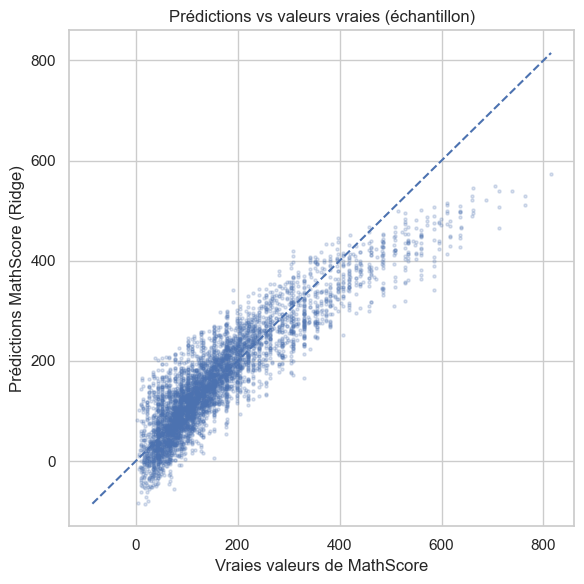

In [21]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Recalcul des prédictions au cas où
preds = pipeline.predict(X_test)

# 2. R²
r2 = r2_score(y_test, preds)
print("RMSE baseline Ridge :", root_mean_squared_error(y_test, preds))
print("R² baseline Ridge   :", r2)
print("Corrélation prédiction vs réel :", np.corrcoef(preds, y_test)[0, 1])

# 3. Scatter plot prédictions vs valeurs vraies
#    (on échantillonne pour que le plot reste lisible)
n_points = 5000
if len(y_test) > n_points:
    idx = np.random.RandomState(42).choice(len(y_test), size=n_points, replace=False)
    y_plot = y_test.values[idx]
    preds_plot = preds[idx]
else:
    y_plot = y_test.values
    preds_plot = preds

plt.figure(figsize=(6, 6))
plt.scatter(y_plot, preds_plot, alpha=0.2, s=5)
min_val = min(y_plot.min(), preds_plot.min())
max_val = max(y_plot.max(), preds_plot.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")
plt.xlabel("Vraies valeurs de MathScore")
plt.ylabel("Prédictions MathScore (Ridge)")
plt.title("Prédictions vs valeurs vraies (échantillon)")
plt.tight_layout()
plt.show()


In [25]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. On repart de df_model
data = df_model.copy()

# 2. On enlève CNTRYID qui duplique le pays (CNT)
if "CNTRYID" in data.columns:
    data = data.drop(columns=["CNTRYID"])

# 3. Séparation X / y
target_col = "MathScore"
X = data.drop(columns=[target_col])
y = data[target_col]

# 4. Encodage simple des colonnes catégorielles en entiers
cat_cols = ["CNT", "CYC", "STRATUM"]
for col in cat_cols:
    if col in X.columns:
        X[col] = X[col].astype("category").cat.codes  # NaN -> -1

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# 6. Modèle HistGradientBoosting
hgb = HistGradientBoostingRegressor(
    loss="squared_error",
    learning_rate=0.1,
    max_depth=6,
    max_bins=255,
    random_state=42
)

hgb.fit(X_train, y_train)

# 7. Évaluation
preds = hgb.predict(X_test)

rmse = root_mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
corr = np.corrcoef(preds, y_test)[0, 1]

print("RMSE HistGradientBoosting :", rmse)
print("R² HistGradientBoosting   :", r2)
print("Corrélation :", corr)


RMSE HistGradientBoosting : 9.563423127413277
R² HistGradientBoosting   : 0.9935470684021234
Corrélation : 0.9967683409332545


RMSE HistGradientBoosting : 9.563423127413277
R² HistGradientBoosting   : 0.9935470684021234
Corrélation : 0.9967683409332545


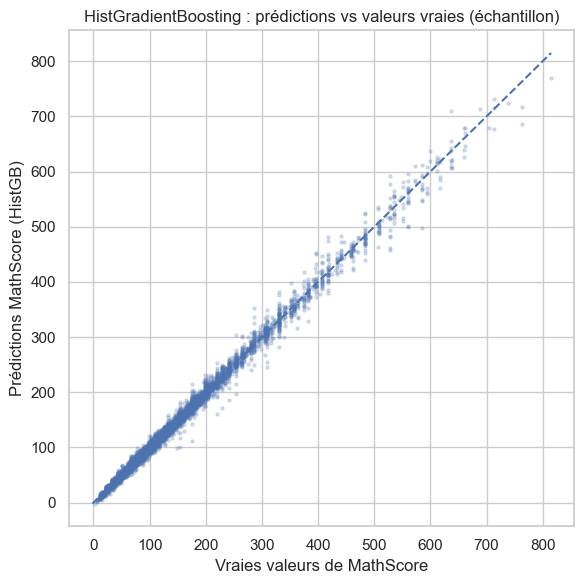

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Recalcule des prédictions au cas où
preds_hgb = hgb.predict(X_test)

rmse_hgb = root_mean_squared_error(y_test, preds_hgb)
r2_hgb = r2_score(y_test, preds_hgb)
corr_hgb = np.corrcoef(preds_hgb, y_test)[0, 1]

print("RMSE HistGradientBoosting :", rmse_hgb)
print("R² HistGradientBoosting   :", r2_hgb)
print("Corrélation :", corr_hgb)

# Scatter plot prédictions vs valeurs vraies
n_points = 5000
if len(y_test) > n_points:
    rng = np.random.RandomState(42)
    idx = rng.choice(len(y_test), size=n_points, replace=False)
    y_plot = y_test.values[idx]
    preds_plot = preds_hgb[idx]
else:
    y_plot = y_test.values
    preds_plot = preds_hgb

plt.figure(figsize=(6, 6))
plt.scatter(y_plot, preds_plot, alpha=0.2, s=5)
min_val = min(y_plot.min(), preds_plot.min())
max_val = max(y_plot.max(), preds_plot.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")
plt.xlabel("Vraies valeurs de MathScore")
plt.ylabel("Prédictions MathScore (HistGB)")
plt.title("HistGradientBoosting : prédictions vs valeurs vraies (échantillon)")
plt.tight_layout()
plt.show()


In [28]:
import numpy as np
import pandas as pd

df_fe = df_model.copy()

# --- 1. ISCEDP ---
if "ISCEDP" in df_fe.columns:
    isced_str = df_fe["ISCEDP"].astype(str)

    # Premier chiffre = niveau principal (0–8 en général)
    df_fe["ISCEDP_level"] = pd.to_numeric(
        isced_str.str.extract(r"(\d)", expand=False),
        errors="coerce"
    )

    # Deuxième chiffre (sous-niveau), facultatif
    df_fe["ISCEDP_sub"] = pd.to_numeric(
        isced_str.str.extract(r"^\d(\d)", expand=False),
        errors="coerce"
    )
else:
    print("⚠️ ISCEDP non trouvé dans df_model")

# --- 2. OCOD1 ---
if "OCOD1" in df_fe.columns:
    ocod_str = df_fe["OCOD1"].astype(str)

    # Groupe majeur = premier chiffre
    df_fe["OCOD_major"] = pd.to_numeric(
        ocod_str.str.extract(r"(\d)", expand=False),
        errors="coerce"
    )

    # Sous-groupe = premiers 2 chiffres
    df_fe["OCOD_minor"] = pd.to_numeric(
        ocod_str.str.extract(r"(\d{2})", expand=False),
        errors="coerce"
    )
else:
    print("⚠️ OCOD1 non trouvé dans df_model")

# Vérification rapide
cols_to_show = [c for c in ["ISCEDP", "ISCEDP_level", "ISCEDP_sub",
                            "OCOD1", "OCOD_major", "OCOD_minor"]
                if c in df_fe.columns]

print(df_fe[cols_to_show].head())


   ISCEDP  ISCEDP_level  ISCEDP_sub   OCOD1  OCOD_major  OCOD_minor
0   244.0           2.0         4.0  3256.0         3.0        32.0
1     NaN           NaN         NaN  2330.0         2.0        23.0
4     NaN           NaN         NaN  9701.0         9.0        97.0
5     NaN           NaN         NaN  9111.0         9.0        91.0
7   354.0           3.0         5.0  5223.0         5.0        52.0


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# On repart de df_fe (avec ISCEDP_level, OCOD_major, OCOD_minor)
data_fe = df_fe.copy()

# 1. Supprimer le doublon de pays
if "CNTRYID" in data_fe.columns:
    data_fe = data_fe.drop(columns=["CNTRYID"])

target_col = "MathScore"
X_fe = data_fe.drop(columns=[target_col])
y_fe = data_fe[target_col]

# 2. Encodage simple des colonnes catégorielles (CNT, CYC, STRATUM)
cat_cols = [col for col in ["CNT", "CYC", "STRATUM"] if col in X_fe.columns]

for col in cat_cols:
    X_fe[col] = X_fe[col].astype("category").cat.codes  # NaN -> -1

print("Nb features totales :", X_fe.shape[1])
print("Colonnes catégorielles encodées :", cat_cols)

# 3. Train-test split
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    X_fe, y_fe, test_size=0.15, random_state=42
)

# 4. Modèle HistGradientBoosting
hgb_fe = HistGradientBoostingRegressor(
    loss="squared_error",
    learning_rate=0.1,
    max_depth=6,
    max_bins=255,
    random_state=42
)

hgb_fe.fit(X_train_fe, y_train_fe)

# 5. Évaluation
preds_fe = hgb_fe.predict(X_test_fe)

rmse_fe = root_mean_squared_error(y_test_fe, preds_fe)
r2_fe = r2_score(y_test_fe, preds_fe)
corr_fe = np.corrcoef(preds_fe, y_test_fe)[0, 1]

print("\n=== Modèle HistGB avec ISCEDP/OCOD ingénierés ===")
print("RMSE :", rmse_fe)
print("R²   :", r2_fe)
print("Corrélation :", corr_fe)

# Même résultat avec les features en plus, la performance est saturée.

Nb features totales : 268
Colonnes catégorielles encodées : ['CNT', 'CYC', 'STRATUM']

=== Modèle HistGB avec ISCEDP/OCOD ingénierés ===
RMSE : 9.563423127413277
R²   : 0.9935470684021234
Corrélation : 0.9967683409332545


In [33]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Repartir de df_fe (avec ISCEDP/OCOD déjà ajoutés)
df_no_math = df_fe.copy()

# 1. Identifier toutes les colonnes math
math_cols = [c for c in df_no_math.columns if "math_q" in c.lower()]

print("Nombre de colonnes math à retirer :", len(math_cols))
print("Exemples :", math_cols[:10])

# 2. Retirer les colonnes math
df_no_math = df_no_math.drop(columns=math_cols)

# Retirer CNTRYID si pas encore supprimé
if "CNTRYID" in df_no_math.columns:
    df_no_math = df_no_math.drop(columns=["CNTRYID"])

# 3. Préparer X et y
target_col = "MathScore"
X_nm = df_no_math.drop(columns=[target_col])
y_nm = df_no_math[target_col]

# Encodage des catégorielles CNT, CYC, STRATUM
cat_cols = [col for col in ["CNT", "CYC", "STRATUM"] if col in X_nm.columns]
for col in cat_cols:
    X_nm[col] = X_nm[col].astype("category").cat.codes  # NaN -> -1

# 4. Train test split
X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(
    X_nm, y_nm, test_size=0.15, random_state=42
)

# 5. Modèle HGB
hgb_nm = HistGradientBoostingRegressor(
    loss="squared_error",
    learning_rate=0.1,
    max_depth=6,
    max_bins=255,
    random_state=42
)

hgb_nm.fit(X_train_nm, y_train_nm)

# 6. Évaluation
preds_nm = hgb_nm.predict(X_test_nm)

rmse_nm = root_mean_squared_error(y_test_nm, preds_nm)
r2_nm = r2_score(y_test_nm, preds_nm)
corr_nm = np.corrcoef(preds_nm, y_test_nm)[0, 1]

print("\n=== HistGB SANS les items de math ===")
print("RMSE :", rmse_nm)
print("R²   :", r2_nm)
print("Corrélation :", corr_nm)


Nombre de colonnes math à retirer : 28
Exemples : ['math_q1_average_score', 'math_q2_average_score', 'math_q3_average_score', 'math_q4_average_score', 'math_q5_average_score', 'math_q6_average_score', 'math_q7_average_score', 'math_q8_average_score', 'math_q9_average_score', 'math_q10_average_score']

=== HistGB SANS les items de math ===
RMSE : 74.68460258949337
R²   : 0.6064567500892396
Corrélation : 0.7789175013609695


RMSE (root_mean_squared_error) : 74.68460258949337
R² : 0.6064567500892396
Corrélation : 0.7789175013609695


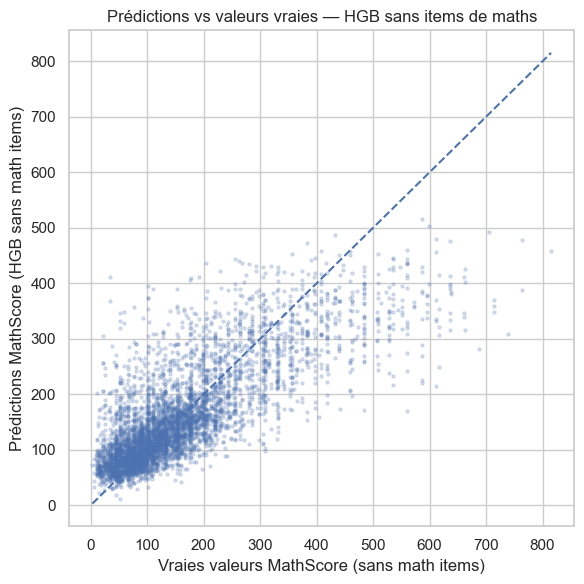

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, root_mean_squared_error

# Recalcul des prédictions pour sécurité
preds_nm = hgb_nm.predict(X_test_nm)

# --- Scores ---
rmse_nm = root_mean_squared_error(y_test_nm, preds_nm)
r2_nm   = r2_score(y_test_nm, preds_nm)
corr_nm = np.corrcoef(preds_nm, y_test_nm)[0, 1]

print("RMSE (root_mean_squared_error) :", rmse_nm)
print("R² :", r2_nm)
print("Corrélation :", corr_nm)

# --- Scatter plot ---
n_points = 5000
if len(y_test_nm) > n_points:
    rng = np.random.RandomState(42)
    idx = rng.choice(len(y_test_nm), size=n_points, replace=False)
    y_plot = y_test_nm.values[idx]
    preds_plot = preds_nm[idx]
else:
    y_plot = y_test_nm.values
    preds_plot = preds_nm

plt.figure(figsize=(6, 6))
plt.scatter(y_plot, preds_plot, alpha=0.2, s=5)

min_val = min(y_plot.min(), preds_plot.min())
max_val = max(y_plot.max(), preds_plot.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")

plt.xlabel("Vraies valeurs MathScore (sans math items)")
plt.ylabel("Prédictions MathScore (HGB sans math items)")
plt.title("Prédictions vs valeurs vraies — HGB sans items de maths")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error
import numpy as np

# 1. Repartir du DF enrichi
df_fe2 = df_fe.copy()

# 2. Supprimer toutes les colonnes math
math_cols = [c for c in df_fe2.columns if "math_q" in c.lower()]
df_fe2 = df_fe2.drop(columns=math_cols)

# 3. Supprimer CNTRYID (doublon)
if "CNTRYID" in df_fe2.columns:
    df_fe2 = df_fe2.drop(columns=["CNTRYID"])

target_col = "MathScore"
X = df_fe2.drop(columns=[target_col])
y = df_fe2[target_col]

# 4. Encodage simple CNT / CYC / STRATUM
cat_cols = [c for c in ["CNT", "CYC", "STRATUM"] if c in X.columns]
for col in cat_cols:
    X[col] = X[col].astype("category").cat.codes  # NaN -> -1

# 5. Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# 6. HistGB model
model = HistGradientBoostingRegressor(
    loss="squared_error",
    learning_rate=0.10,
    max_depth=6,
    max_bins=255,
    random_state=42
)

model.fit(X_train2, y_train2)

# 7. Evaluation
pred2 = model.predict(X_test2)

rmse2 = root_mean_squared_error(y_test2, pred2)
r2_2  = r2_score(y_test2, pred2)
corr2 = np.corrcoef(pred2, y_test2)[0, 1]

print("=== HGB sans items math + features socio-éco avancées ===")
print("RMSE :", rmse2)
print("R²   :", r2_2)
print("Corr :", corr2)

# Aucune différence

=== HGB sans items math + features socio-éco avancées ===
RMSE : 74.68460258949337
R²   : 0.6064567500892396
Corr : 0.7789175013609695


Shape X_test_fe : (108797, 268)

Top 30 features par permutation importance :
                    feature  importance_mean  importance_std
1                      Year         0.109236        0.000544
212   math_q8_average_score         0.043074        0.000298
211   math_q7_average_score         0.042063        0.000134
213   math_q9_average_score         0.040702        0.000146
210   math_q6_average_score         0.039061        0.000191
209   math_q5_average_score         0.036838        0.000071
215  math_q11_average_score         0.035319        0.000171
205   math_q1_average_score         0.035025        0.000157
206   math_q2_average_score         0.034198        0.000226
208   math_q4_average_score         0.034060        0.000142
207   math_q3_average_score         0.033754        0.000134
216  math_q12_average_score         0.033591        0.000142
214  math_q10_average_score         0.031985        0.000183
217  math_q13_average_score         0.021685        0.000209
92     

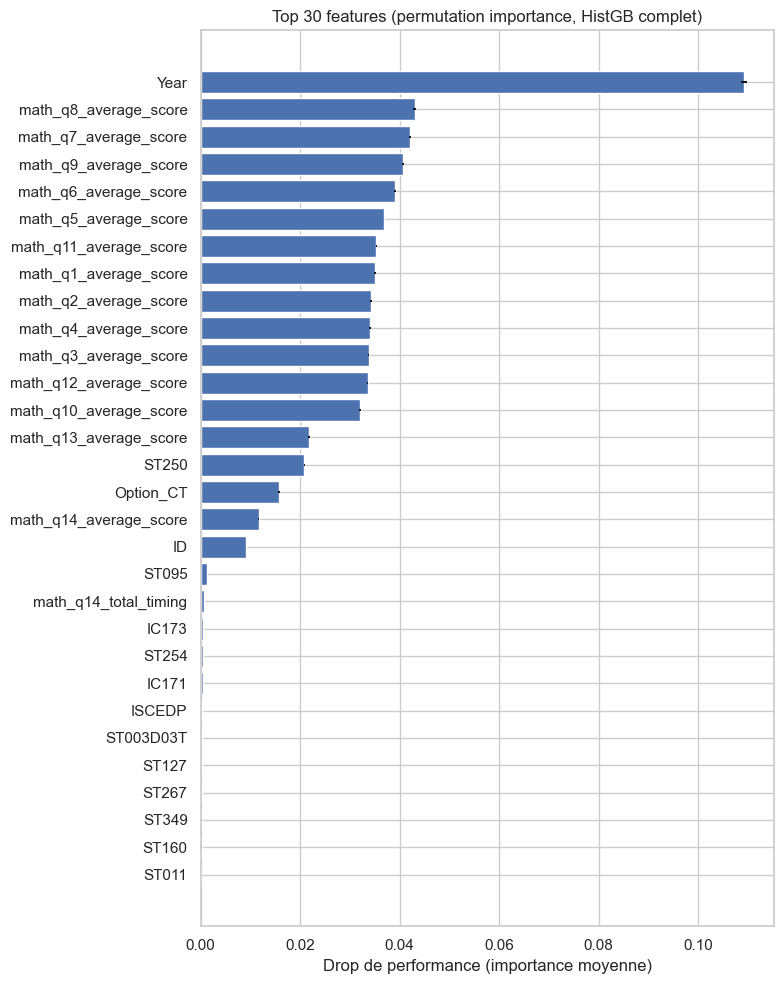

In [38]:
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# On part du modèle complet hgb_fe, et des données X_test_fe / y_test_fe
# (entraînés plus tôt)

print("Shape X_test_fe :", X_test_fe.shape)

# 1. Calcul de la permutation importance
result = permutation_importance(
    hgb_fe,
    X_test_fe,
    y_test_fe,
    n_repeats=5,
    random_state=42,
    n_jobs=-1
)

importances = result.importances_mean
stds = result.importances_std
feature_names = X_fe.columns  # même ordre que lors du fit

fi = pd.DataFrame({
    "feature": feature_names,
    "importance_mean": importances,
    "importance_std": stds
}).sort_values("importance_mean", ascending=False)

print("\nTop 30 features par permutation importance :")
print(fi.head(30))

# 2. Visualisation top 30
topn = 30
fi_top = fi.head(topn).iloc[::-1]  # pour avoir le plus important en haut du plot

plt.figure(figsize=(8, 10))
plt.barh(fi_top["feature"], fi_top["importance_mean"], xerr=fi_top["importance_std"])
plt.title(f"Top {topn} features (permutation importance, HistGB complet)")
plt.xlabel("Drop de performance (importance moyenne)")
plt.tight_layout()
plt.show()


Taille de l'échantillon SHAP : (3000, 268)


 98%|===================| 2939/3000 [00:21<00:00]        

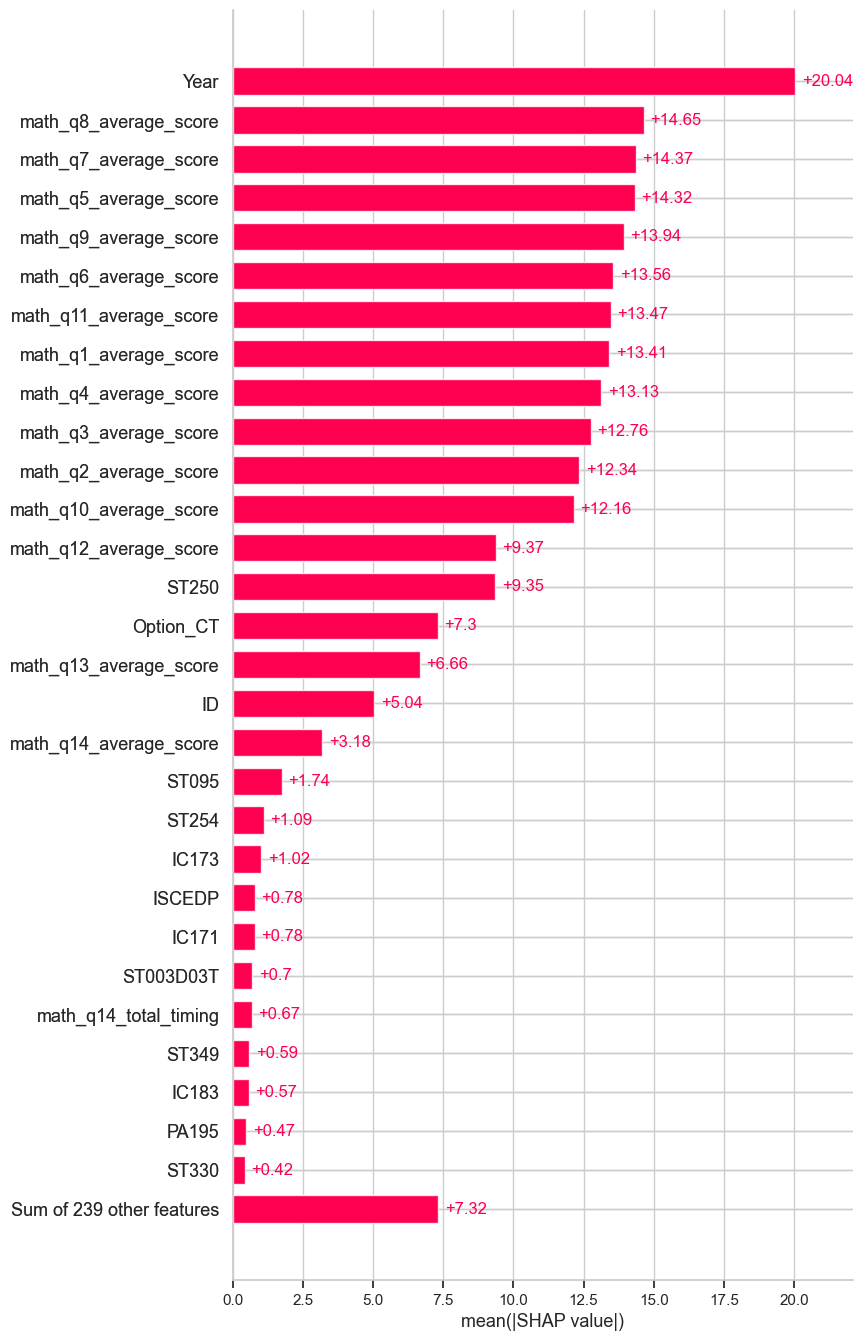

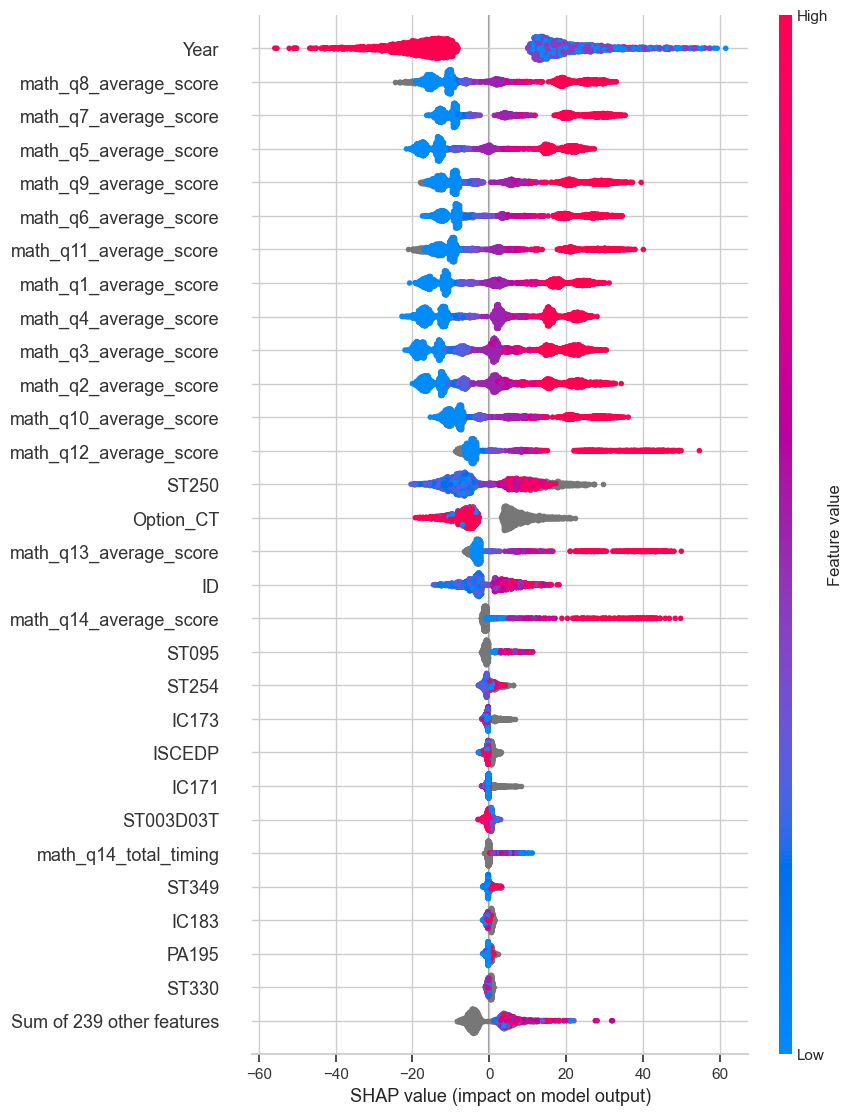

In [40]:
import numpy as np
import shap
import matplotlib.pyplot as plt

# 1) Échantillon pour SHAP
n_sample = 3000
if len(X_test_fe) > n_sample:
    rng = np.random.RandomState(42)
    idx = rng.choice(len(X_test_fe), size=n_sample, replace=False)
    X_shap = X_test_fe.iloc[idx].copy()
    y_shap = y_test_fe.iloc[idx].copy()
else:
    X_shap = X_test_fe.copy()
    y_shap = y_test_fe.copy()

print("Taille de l'échantillon SHAP :", X_shap.shape)

# 2) Background pour l'explainer (échantillon d'entraînement)
n_bg = 2000
if len(X_train_fe) > n_bg:
    bg_idx = np.random.RandomState(42).choice(len(X_train_fe), size=n_bg, replace=False)
    X_bg = X_train_fe.iloc[bg_idx].copy()
else:
    X_bg = X_train_fe.copy()

# 3) TreeExplainer explicite sur HistGradientBoosting
explainer = shap.TreeExplainer(hgb_fe, X_bg, feature_perturbation="interventional")

# 4) SHAP values avec check_additivity désactivé
shap_values = explainer(X_shap, check_additivity=False)

# 5) Barplot importance globale (top 30)
shap.plots.bar(shap_values, max_display=30)

# 6) Beeswarm : distribution des effets (top 30)
shap.plots.beeswarm(shap_values, max_display=30)


Taille échantillon SHAP : (3000, 240)


 92%|==================  | 2751/3000 [00:12<00:01]       


Top 50 features (SHAP, modèle SANS math_qX) :
                      feature  mean_abs_shap
92                      ST250      27.944925
205  science_q1_average_score      11.091001
196  reading_q1_average_score      10.001621
110                     ST290       7.904550
198  reading_q3_average_score       5.852859
9                        OECD       5.791992
24                  ST004D01T       5.098881
206  science_q2_average_score       4.995039
197  reading_q2_average_score       4.931443
201  reading_q6_average_score       4.773996
44                      ST255       4.642102
208  science_q4_average_score       4.544107
207  science_q3_average_score       4.403187
11               LANGTEST_QQQ       4.219258
211  science_q7_average_score       3.953269
209  science_q5_average_score       3.934975
202  reading_q7_average_score       3.654769
112                     ST254       3.492966
210  science_q6_average_score       3.359022
200  reading_q5_average_score       2.924030
212  sci

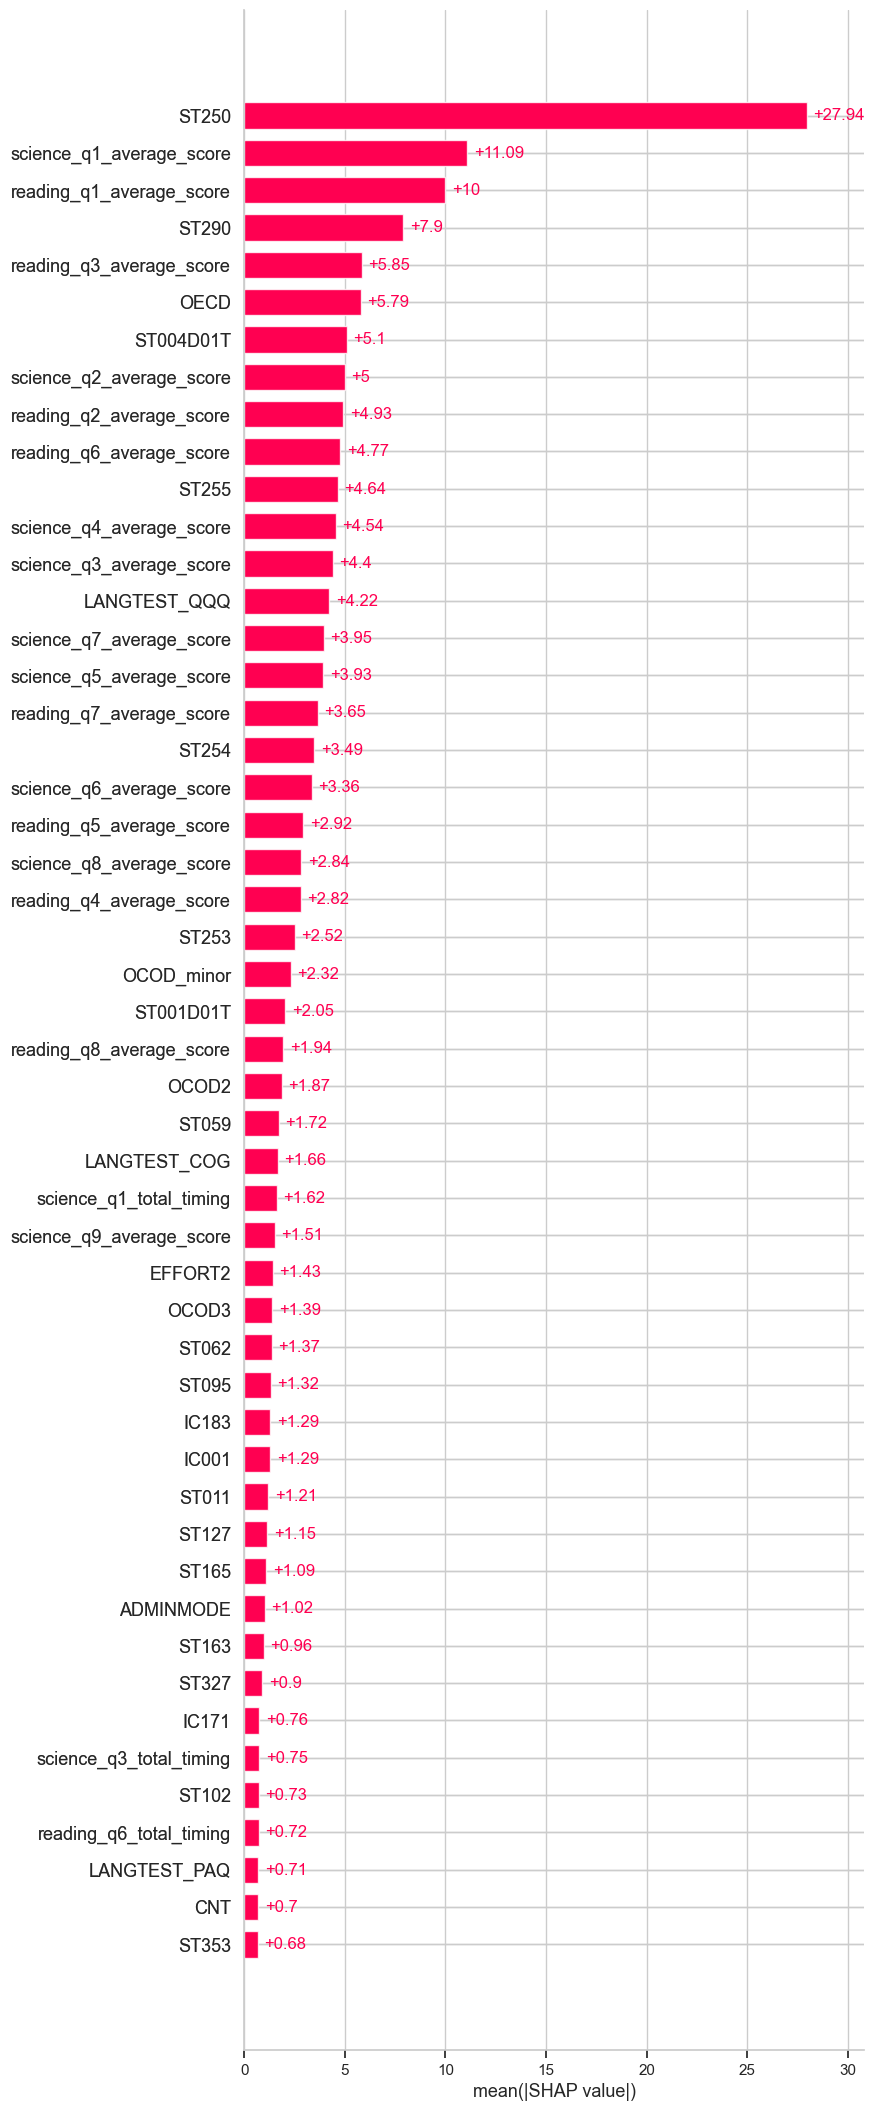

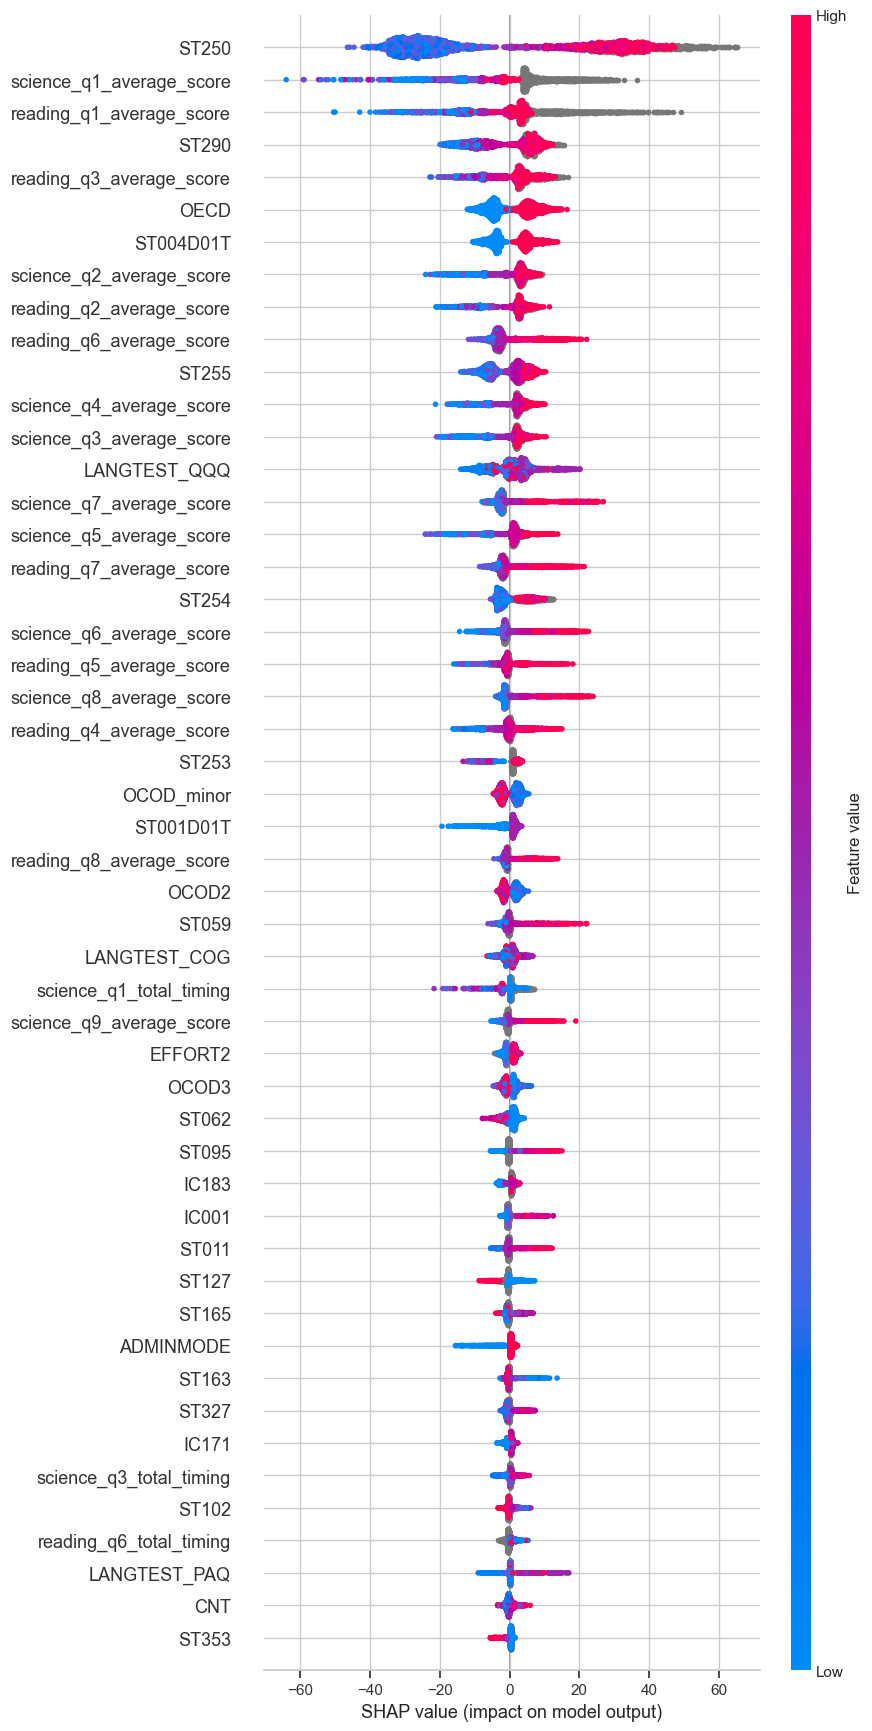

In [45]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

# ================================
# 1) Préparation des données SHAP
# ================================

# Échantillon pour SHAP (sur le modèle SANS math_qX : hgb_nm, X_test_nm, y_test_nm)
n_sample = 3000
if len(X_test_nm) > n_sample:
    rng = np.random.RandomState(42)
    idx = rng.choice(len(X_test_nm), size=n_sample, replace=False)
    X_shap_nm = X_test_nm.iloc[idx].copy()
    y_shap_nm = y_test_nm.iloc[idx].copy()
else:
    X_shap_nm = X_test_nm.copy()
    y_shap_nm = y_test_nm.copy()

print("Taille échantillon SHAP :", X_shap_nm.shape)

# Background sample pour TreeExplainer (pris dans le train)
n_bg = 2000
if len(X_train_nm) > n_bg:
    bg_idx = np.random.RandomState(42).choice(len(X_train_nm), size=n_bg, replace=False)
    X_bg_nm = X_train_nm.iloc[bg_idx].copy()
else:
    X_bg_nm = X_train_nm.copy()

# ================================
# 2) Calcul des SHAP values
# ================================

explainer_nm = shap.TreeExplainer(
    hgb_nm,
    X_bg_nm,
    feature_perturbation="interventional"
)

shap_values_nm = explainer_nm(X_shap_nm, check_additivity=False)

# ================================
# 3) Importance globale = mean(|SHAP|)
# ================================

shap_abs_mean = np.abs(shap_values_nm.values).mean(axis=0)
feat_names_nm = X_shap_nm.columns

fi_shap_nm = pd.DataFrame({
    "feature": feat_names_nm,
    "mean_abs_shap": shap_abs_mean
}).sort_values("mean_abs_shap", ascending=False)

print("\nTop 50 features (SHAP, modèle SANS math_qX) :")
print(fi_shap_nm.head(50))

# ================================
# 4) Sélection du vrai top 50 pour les plots
# ================================

top50_feats = fi_shap_nm["feature"].head(50).tolist()
print("\nTop 10 features (noms) :", top50_feats[:10])

# mapping feature -> index dans X_shap_nm
feat_to_idx = {name: i for i, name in enumerate(X_shap_nm.columns)}

top50_idx = [feat_to_idx[f] for f in top50_feats if f in feat_to_idx]
print("Nombre de features retrouvées dans X_shap_nm :", len(top50_idx))

# sous-ensemble SHAP correspondant à ces 50 features
shap_top50 = shap_values_nm[:, top50_idx]

# ================================
# 5) Plots SHAP : bar + beeswarm
# ================================

shap.plots.bar(shap_top50, max_display=50)
shap.plots.beeswarm(shap_top50, max_display=50)


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error
import numpy as np

# On repart de X_nm, y_nm (modèle sans items de maths)
# et de fi_shap_nm (tableau avec mean_abs_shap déjà calculé)

# 1) Sélection des 50 meilleures variables selon SHAP
top50_feats = fi_shap_nm["feature"].head(50).tolist()
print("Top 10 features utilisées :", top50_feats[:10])
print("Nombre total de features utilisées :", len(top50_feats))

X_core = X_nm[top50_feats].copy()
y_core = y_nm.copy()

# 2) Train-test split
X_train_core, X_test_core, y_train_core, y_test_core = train_test_split(
    X_core, y_core, test_size=0.15, random_state=42
)

# 3) Modèle HGB sur ce sous-ensemble de variables
hgb_core = HistGradientBoostingRegressor(
    loss="squared_error",
    learning_rate=0.10,
    max_depth=6,
    max_bins=255,
    random_state=42
)

hgb_core.fit(X_train_core, y_train_core)

# 4) Évaluation
pred_core = hgb_core.predict(X_test_core)

rmse_core = root_mean_squared_error(y_test_core, pred_core)
r2_core = r2_score(y_test_core, pred_core)
corr_core = np.corrcoef(pred_core, y_test_core)[0, 1]

print("\n=== Modèle HGB SANS math_qX, avec seulement les 50 meilleures features SHAP ===")
print("RMSE :", rmse_core)
print("R²   :", r2_core)
print("Corr :", corr_core)
